In [1]:
import argparse
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import os
import seaborn as sns

import math
import torch.nn as nn
import torch
import torch.utils
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F

In [2]:
np.linspace(0.4, 0.66, 10)

array([0.4       , 0.42888889, 0.45777778, 0.48666667, 0.51555556,
       0.54444444, 0.57333333, 0.60222222, 0.63111111, 0.66      ])

In [18]:
import argparse
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import os
import seaborn as sns


class LogNormalize(colors.Normalize):

    def __init__(self, vmin=None, vmax=None, clip=None, log_alpha=None):
        self.log_alpha = log_alpha
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        log_v = np.ma.log(value - self.vmin)
        log_v = np.ma.maximum(log_v, self.log_alpha)
        return 0.9 * (log_v - self.log_alpha) / (np.log(self.vmax - self.vmin) - self.log_alpha)


def plane(grid, values, vmax=None, log_alpha=-5, N=7, cmap='jet_r', levels=None):
    cmap = plt.get_cmap(cmap)
    if vmax is None:
        clipped = values.copy()
    else:
        clipped = np.minimum(values, vmax)
    log_gamma = (np.log(clipped.max() - clipped.min()) - log_alpha) / N
    if levels is None:
        levels = clipped.min() + np.exp(log_alpha + log_gamma * np.arange(N + 1))
        levels[0] = clipped.min()
        levels[-1] = clipped.max()
        levels = np.concatenate((levels, [1e10]))
#     print(levels)
    levels = np.linspace(clipped.min(), clipped.max(), 10)
#     levels = list(np.linspace(clipped.min(), clipped.min()+10, 5))+list(np.linspace(clipped.min()+10, clipped.max(), 5))[1:]
#     levels = np.concatenate((levels, [1e10]))
#     print(levels)
    norm = LogNormalize(clipped.min() - 1e-8, clipped.max() + 1e-8, log_alpha=log_alpha)
    contour = plt.contour(grid[:, :, 0], grid[:, :, 1], values, cmap=cmap, #norm=norm,
                          linewidths=2.5,
                          zorder=1,
                          levels=levels
                         )
    contourf = plt.contourf(grid[:, :, 0], grid[:, :, 1], values, cmap=cmap, #norm=norm,
                            levels=levels,
                            zorder=0,
                            alpha=0.55)
    colorbar = plt.colorbar(format='%.3g')
    labels = list(colorbar.ax.get_yticklabels())
    labels[-1].set_text(r'>\,' + labels[-2].get_text())
    colorbar.ax.set_yticklabels(labels)
    return contour, contourf, colorbar, levels

In [29]:
def plot(f):
    file = np.load(os.path.join('plots/', f, 'plane.npz'))

    plt.figure(figsize=(12.4, 7))


    contour, contourf, colorbar, levels = plane(
        file['grid'],
        file['te_err'],
        vmax=100,
        log_alpha=-1.0,
        N=7,
    )

    bend_coordinates = file['bend_coordinates']
    curve_coordinates = file['curve_coordinates']

    plt.scatter(bend_coordinates[[0, 2], 0], bend_coordinates[[0, 2], 1], marker='o', c='k', s=120, zorder=2)
    plt.scatter(bend_coordinates[1, 0], bend_coordinates[1, 1], marker='D', c='k', s=120, zorder=2)
    plt.plot(curve_coordinates[:, 0], curve_coordinates[:, 1], linewidth=4, c='k', label='w(t)', zorder=4)
    plt.plot(bend_coordinates[[0, 2], 0], bend_coordinates[[0, 2], 1], c='k', linestyle='--', dashes=(3, 4), linewidth=3, zorder=2)

    plt.margins(0.0)
    plt.yticks(fontsize=18)
    plt.xticks(fontsize=18)
    colorbar.ax.tick_params(labelsize=18)
    plt.show()

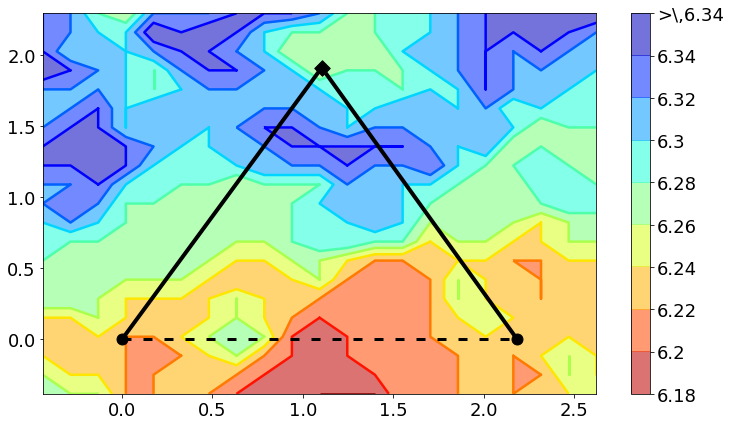

In [30]:
plot('LogRegression_3dif')

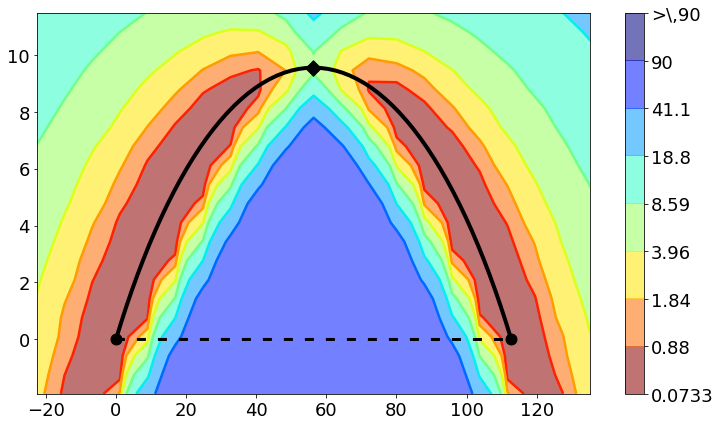

In [33]:
plot('ArcModel1_learned')

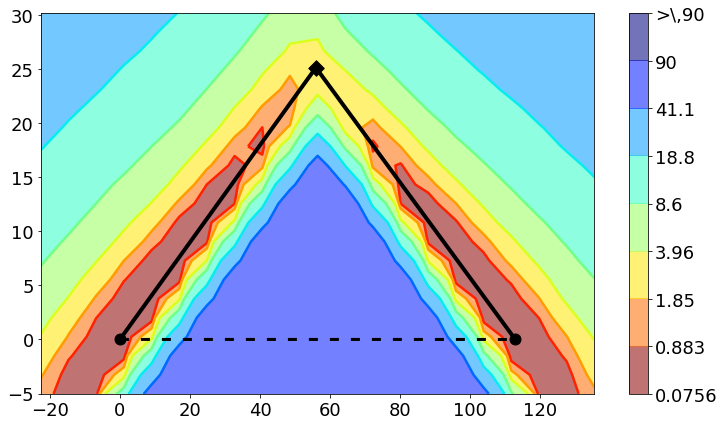

In [34]:
plot('plot-normal-5354')

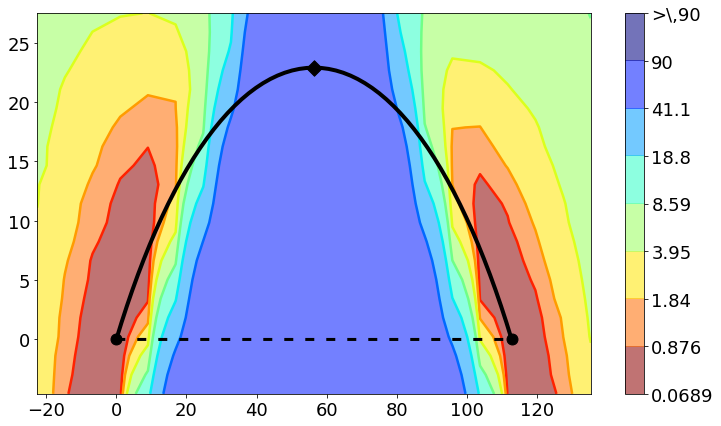

In [35]:
plot('ArcModel1')

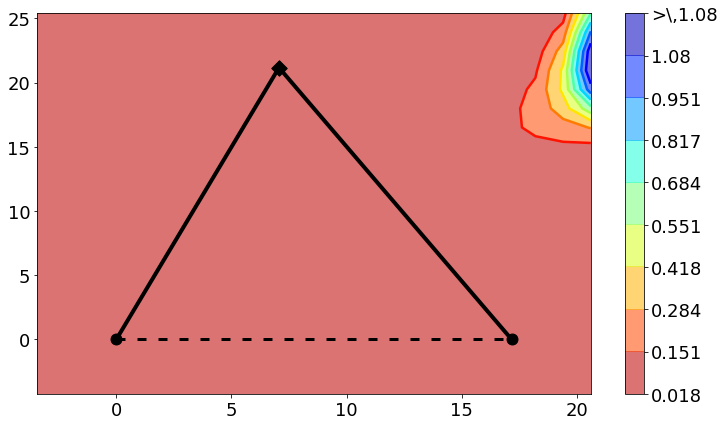

In [165]:
plot('LinSwapp256') 

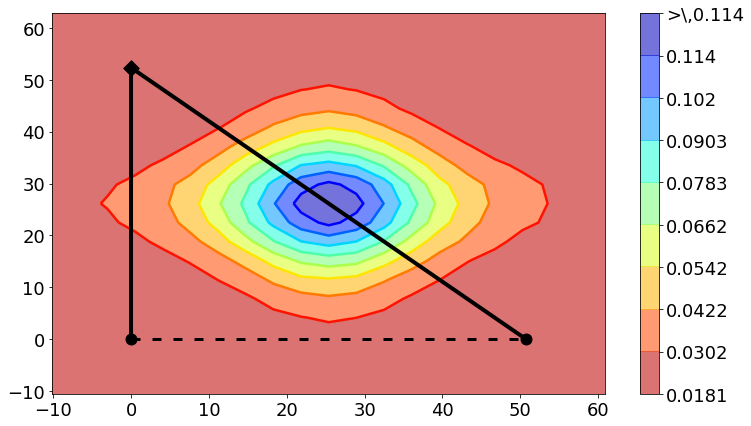

In [164]:
plot('ConvSwapp256') 

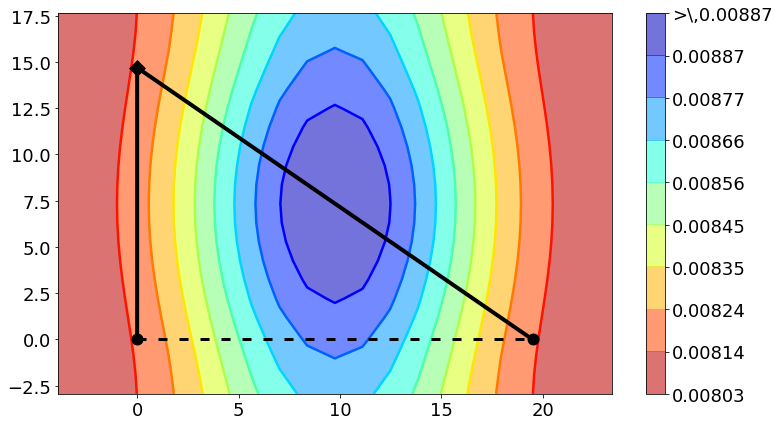

In [162]:
plot('swap_lin_mnist')

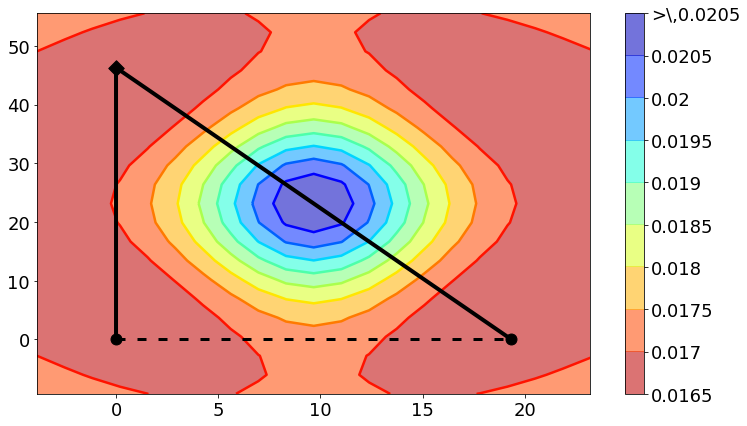

In [163]:
plot('swap_vgg_mnist')

[1.519999999999996, 4.019999999999996, 6.519999999999996, 9.019999999999996, 11.519999999999996, 28.424999999999997, 45.33, 62.235, 79.14]


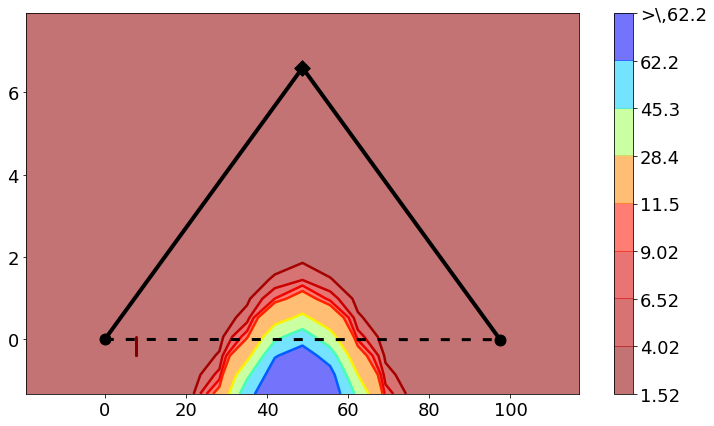

In [130]:
plot('connect_lin_mnist')

[0.6200000000000045, 3.1200000000000045, 5.6200000000000045, 8.120000000000005, 10.620000000000005, 30.495000000000005, 50.370000000000005, 70.245, 90.12]


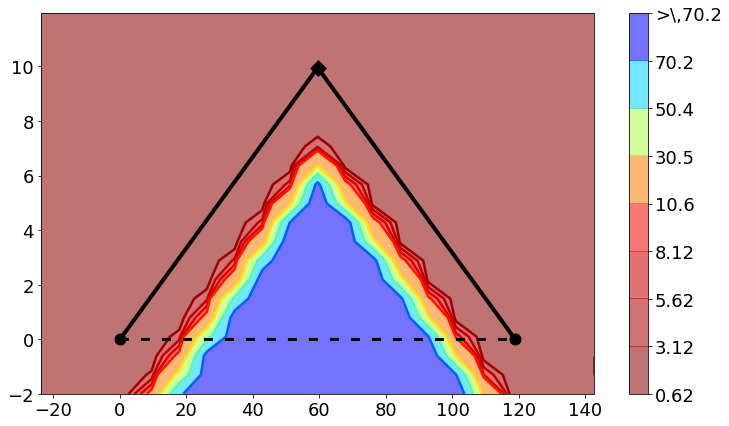

In [131]:
plot('connect_vgg_mnist')

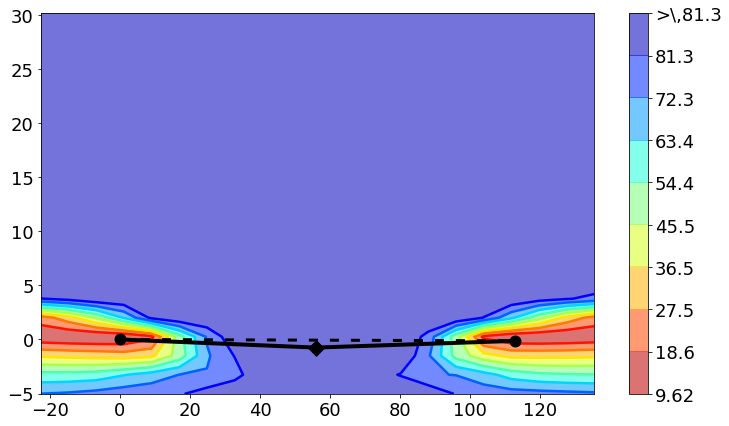

In [139]:
plot('plot-normal-5354grad')